In [2]:
from pynwb import NWBHDF5IO
from src.jdb_to_nwb.plotting.plot_combined import plot_photometry_signal_aligned_to_port_entry

# Replace this with path to your nwb!!
nwb_path = "/Users/steph/berkelab/jdb_to_nwb/conversion_with_probe/IM-1478_20220719.nwb"
nwb_path = "/Users/steph/berkelab/jdb_to_nwb/plot_check/IM-1478_20220719.nwb"

with NWBHDF5IO(nwb_path, mode="r+") as io:
    nwbfile = io.read()
    
    plot_photometry_signal_aligned_to_port_entry(nwbfile, signal_name='z_scored_green_dFF', fig_dir=".")

Maze 0: 8,9,16,18,23,27,35,42,44


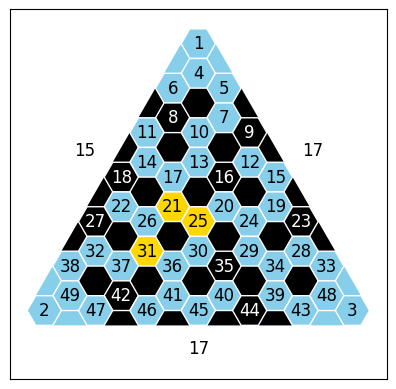

Barrier change: 16 -> 21
Maze 1: 8,9,18,21,23,27,35,42,44


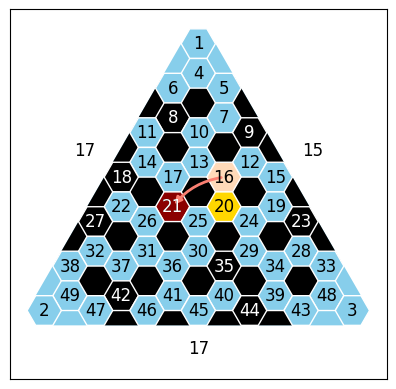

Barrier change: 35 -> 24
Maze 2: 8,9,18,21,23,24,27,42,44


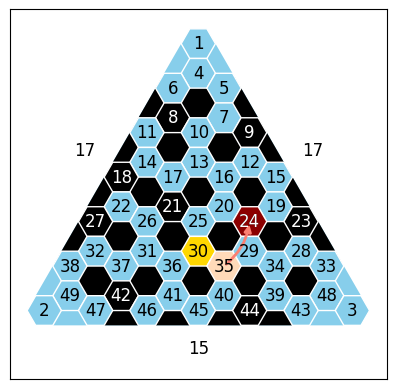

barrier change
['8,9,16,18,23,27,35,42,44', '8,9,18,21,23,27,35,42,44', '8,9,18,21,23,24,27,42,44']
[[90, 10, 50], [90, 10, 50], [90, 10, 50]]


In [16]:
from hexmaze import plot_hex_maze, plot_barrier_change_sequence

# Replace this with path to your nwb!!
nwb_path = "/Users/steph/berkelab/jdb_to_nwb/conversion_with_probe/IM-1478_20220719.nwb"

with NWBHDF5IO(nwb_path, mode="r+") as io:
    nwbfile = io.read()
    
    session_id = nwbfile.session_id

    # Get maze configs for each block
    block_data = nwbfile.intervals["block"].to_dataframe()
    maze_configurations = list(block_data["maze_configuration"])
    reward_probs = block_data[["pA", "pB", "pC"]].values.tolist()
    task_type = block_data["task_type"][0]
    
    if task_type == "barrier change":
        plot_barrier_change_sequence(maze_configurations, show_permanent_barriers=True)
    
    print(task_type)
    print(maze_configurations)
    print(reward_probs)